<a href="https://colab.research.google.com/github/prashantiyaramareddy/MyPython-Stuff/blob/master/MachineLearning/SupportVectorRegression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

### Importing Dataset

In [11]:
data = pd.read_csv('Position_Salaries.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
ct  = ColumnTransformer([('encoder', OneHotEncoder(sparse_output=False), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=float)
y = y.reshape(len(y), 1)

In [14]:
### Train- Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train)

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  6.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  3.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0. 10.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  5.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  7.]]


In [16]:
### Apply standard scalar
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)

In [17]:
print(X_train)

[[-0.37796447  0.         -0.37796447 -0.37796447  0.         -0.37796447
  -0.37796447  2.64575131 -0.37796447 -0.37796447  0.18569534]
 [ 2.64575131  0.         -0.37796447 -0.37796447  0.         -0.37796447
  -0.37796447 -0.37796447 -0.37796447 -0.37796447 -1.67125804]
 [-0.37796447  0.         -0.37796447 -0.37796447  0.         -0.37796447
  -0.37796447 -0.37796447 -0.37796447  2.64575131  0.92847669]
 [-0.37796447  0.         -0.37796447 -0.37796447  0.         -0.37796447
  -0.37796447 -0.37796447  2.64575131 -0.37796447 -0.92847669]
 [-0.37796447  0.          2.64575131 -0.37796447  0.         -0.37796447
  -0.37796447 -0.37796447 -0.37796447 -0.37796447  1.67125804]
 [-0.37796447  0.         -0.37796447  2.64575131  0.         -0.37796447
  -0.37796447 -0.37796447 -0.37796447 -0.37796447 -0.18569534]
 [-0.37796447  0.         -0.37796447 -0.37796447  0.          2.64575131
  -0.37796447 -0.37796447 -0.37796447 -0.37796447 -0.55708601]
 [-0.37796447  0.         -0.37796447 -0.

In [19]:
print(X_test)

[[-0.37796447  1.         -0.37796447 -0.37796447  0.         -0.37796447
  -0.37796447 -0.37796447 -0.37796447 -0.37796447  1.29986737]
 [-0.37796447  0.         -0.37796447 -0.37796447  1.         -0.37796447
  -0.37796447 -0.37796447 -0.37796447 -0.37796447 -1.29986737]]


### Fit SVR model

In [21]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train.ravel())

SVR()

In [23]:
# Predict on the test set
y_pred = svr_model.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

### Metrics

In [25]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R²:", r2)
print("MSE:", mse)

R²: 0.28674070602526935
MSE: 36108751757.47074


In [ ]:
# Plot Predicted vs Actual

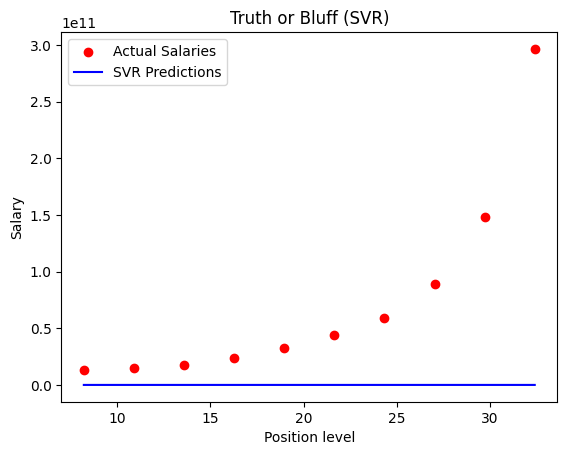

In [30]:
# 1. Prepare X-axis data (Position Level)
# The 'Level' column is the last one in the X array after OneHotEncoding.
X_level_for_plot = sc_X.inverse_transform(X)[:, -1]

# 2. Prepare Y-axis data (Actual Salary)
y_actual_for_plot = sc_y.inverse_transform(y).flatten()

# 3. Prepare Y-axis data (Predicted Salary) for plotting the line
X_scaled_full = sc_X.transform(X) # Scale the entire X dataset for prediction
y_pred_scaled_full = svr_model.predict(X_scaled_full) # Predict on scaled data
y_predicted_for_plot = sc_y.inverse_transform(y_pred_scaled_full.reshape(-1, 1)).flatten() # Inverse transform and flatten

# Now plot
plt.scatter(X_level_for_plot, y_actual_for_plot, color = 'red', label='Actual Salaries')
plt.plot(X_level_for_plot, y_predicted_for_plot, color = 'blue', label='SVR Predictions')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()